In [397]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [398]:
#importing datasets
df_train=pd.read_csv("Bigmart_Datset_Training.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [399]:
df_test=pd.read_csv("Bigmart_Datset_Testing.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [400]:
df_train.shape


(8523, 12)

In [401]:
df_test.shape

(5681, 11)

From the above shape we conclude that the testind dataset doesn't have target variable Item_Outlet_Sales

In [402]:
#statistical summary of training data
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The maximum outlet sales is 13086.964800 against minimum sales 33.290000.
The maximum Item_weight is 21.35 against minimum weight 4.55.
So from the above statistical summary we can infer that there is huge range of data


In [403]:
#checking for null values for training data
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

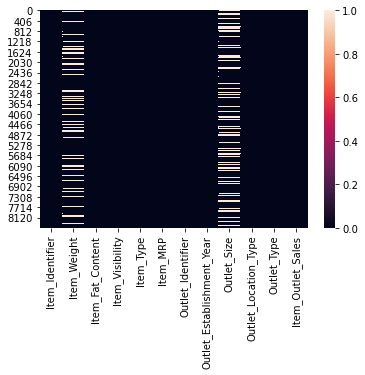

In [404]:
#using heatmap to check the null values for training data
sns.heatmap(df_train.isnull())

So from the above graph it is confirmed that Item_weight and Outlet_size has null values

In [405]:
#checking for null values for testing data
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

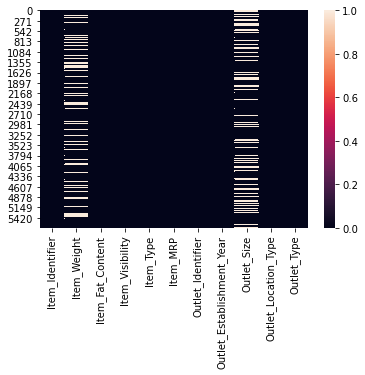

In [406]:
#using heatmap to check the null values for testing data
sns.heatmap(df_test.isnull())

So for training data there are null values in Item_weight and Outlet_size

# Now combining both datasets by ignoring index and providing it with source Train and Test data

In [407]:
df_train["Source"]='train'
df_test["Source"]='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [408]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [409]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [410]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

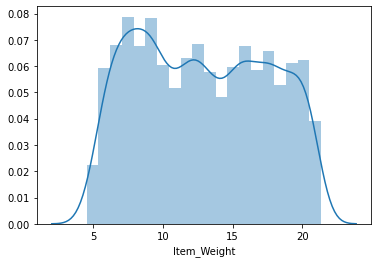

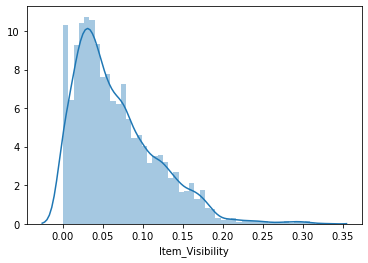

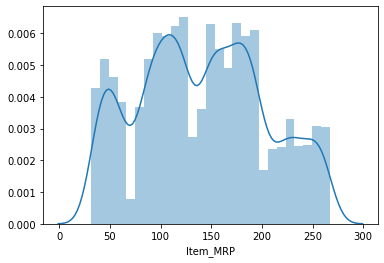

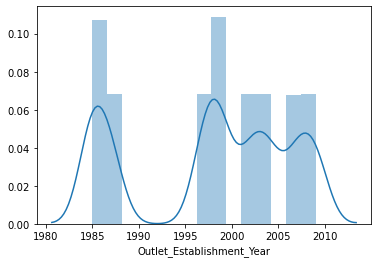

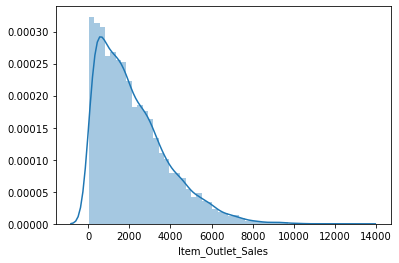

In [411]:
#plotting distribution plot for training_data
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

The distribution plots shows that there is skewness in the data.
For Item_weight most of the data lies between 5 and 20.
For Item_Visibility most of the data lies between 0.01 and 0.06.
For Item_MRP most of the data lies between 50 and 200.
For Outlet_Establishment_year there are various degree of skewness.
For Item_Outlet_Sales most of the data lies between 500 and 2000.
The plots shows various degree of skewness


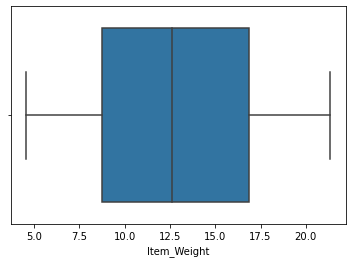

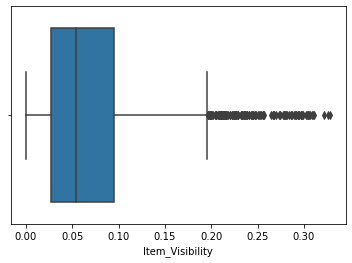

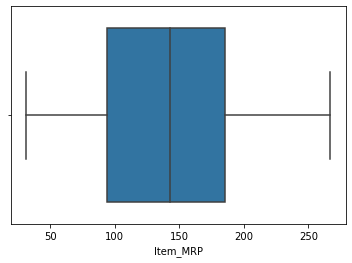

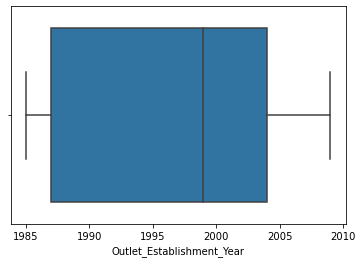

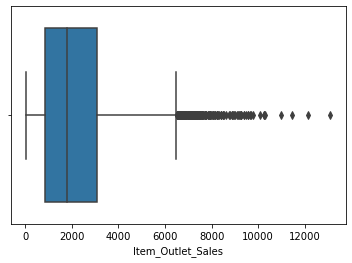

In [412]:
#Boxplot analysis
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna())
    plt.show()

From distplot and boxplot we have this analysis that Item visibility is very low some are not even visible.
There are some outliers present in Item_outlet_Sales as well

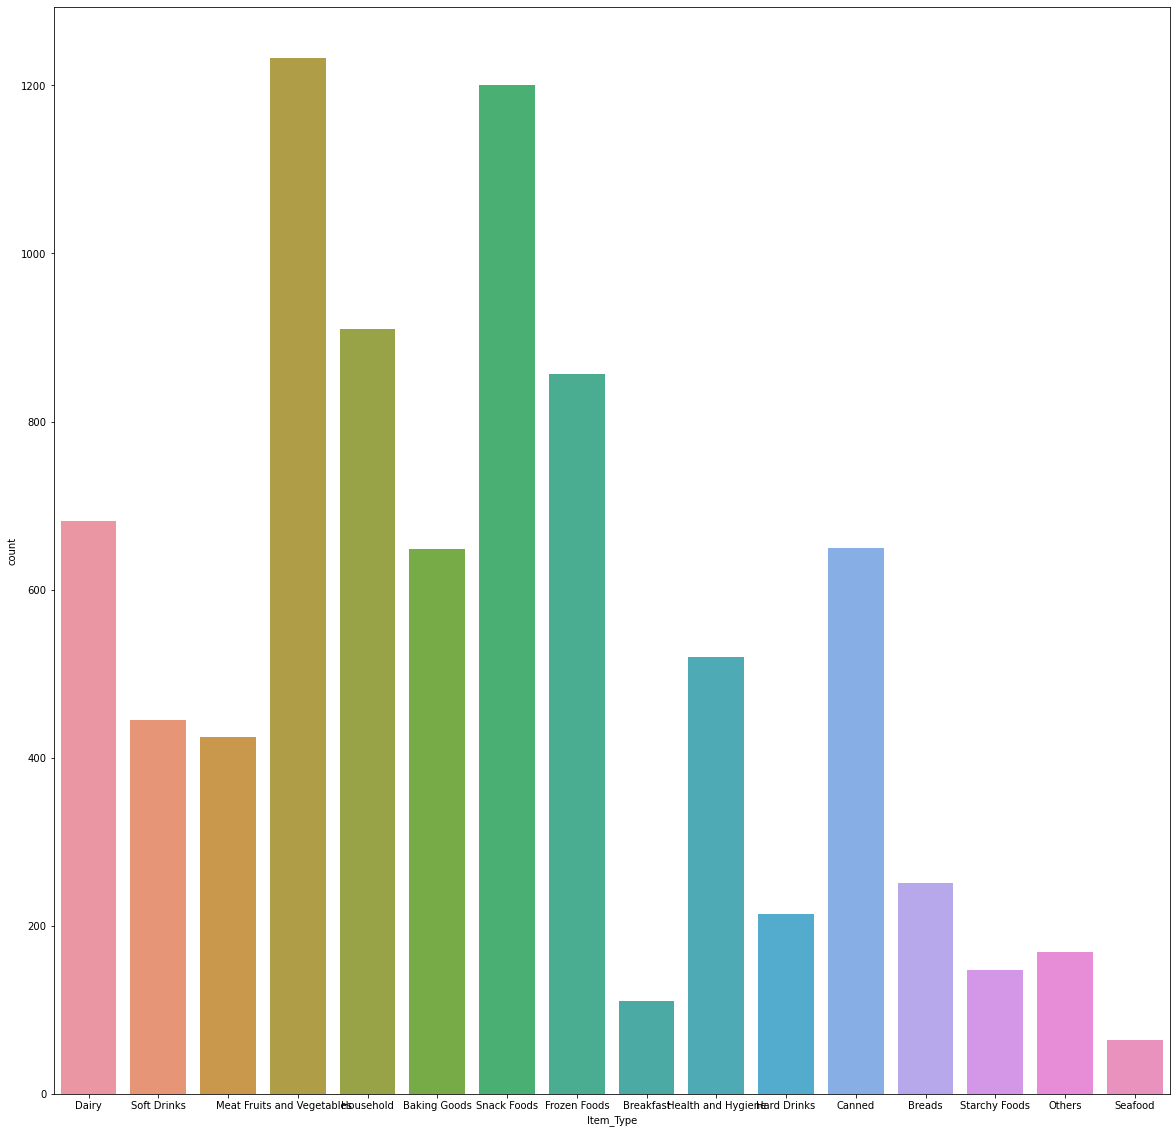

In [413]:
#countplot to know different item types which we have here
plt.figure(figsize=(20,20))
sns.countplot(df_train['Item_Type'])
plt.show()

In [414]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

From the countplot and value_counts it is clear that Fruits and Vegetables have the highest count. That is consumers mainly by this item.
other most counted items are  Snack Foods,Household,Dairy,Frozen Foods and Canned foods.

# Various Distribution


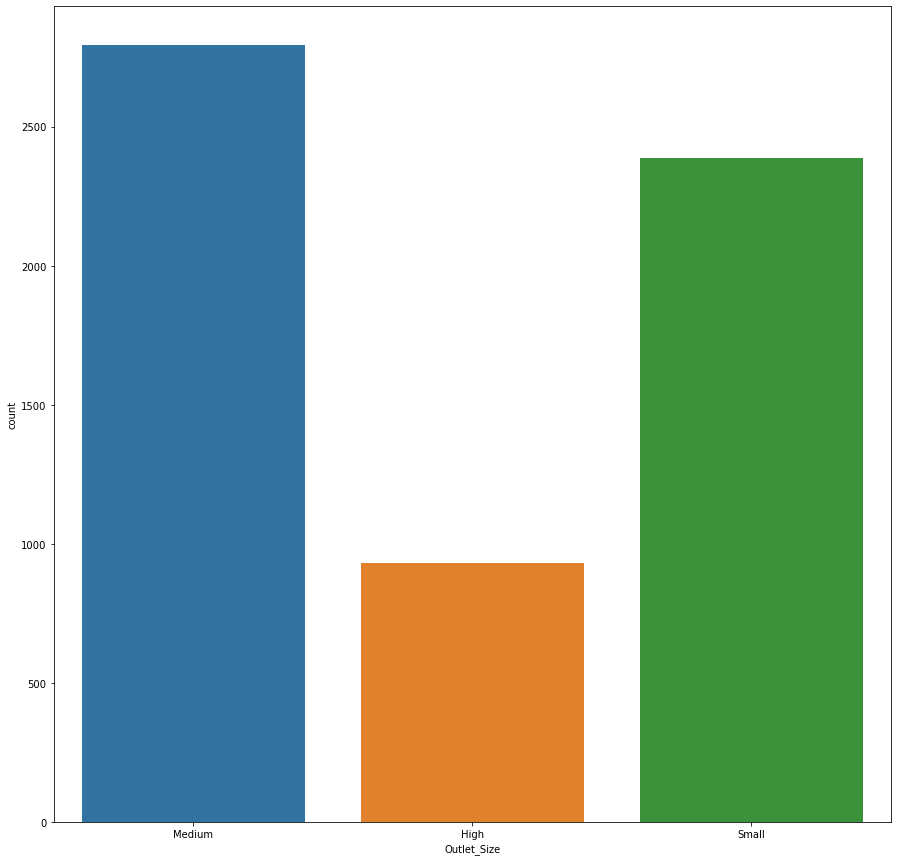

In [415]:
plt.figure(figsize=(15,15))
sns.countplot(df_train["Outlet_Size"])

In [416]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium size outlets have the highest no. of counts

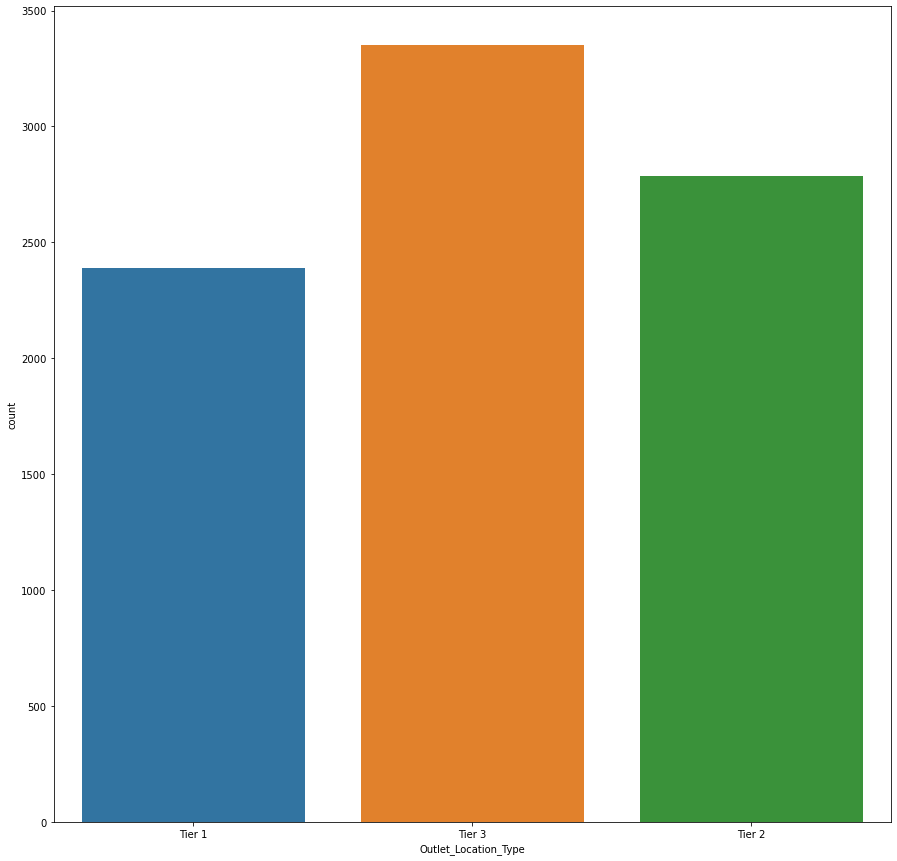

In [417]:
plt.figure(figsize=(15,15))
sns.countplot(df_train["Outlet_Location_Type"])

In [418]:
df_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Most of the Outlets are located in Tier 3 cities

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

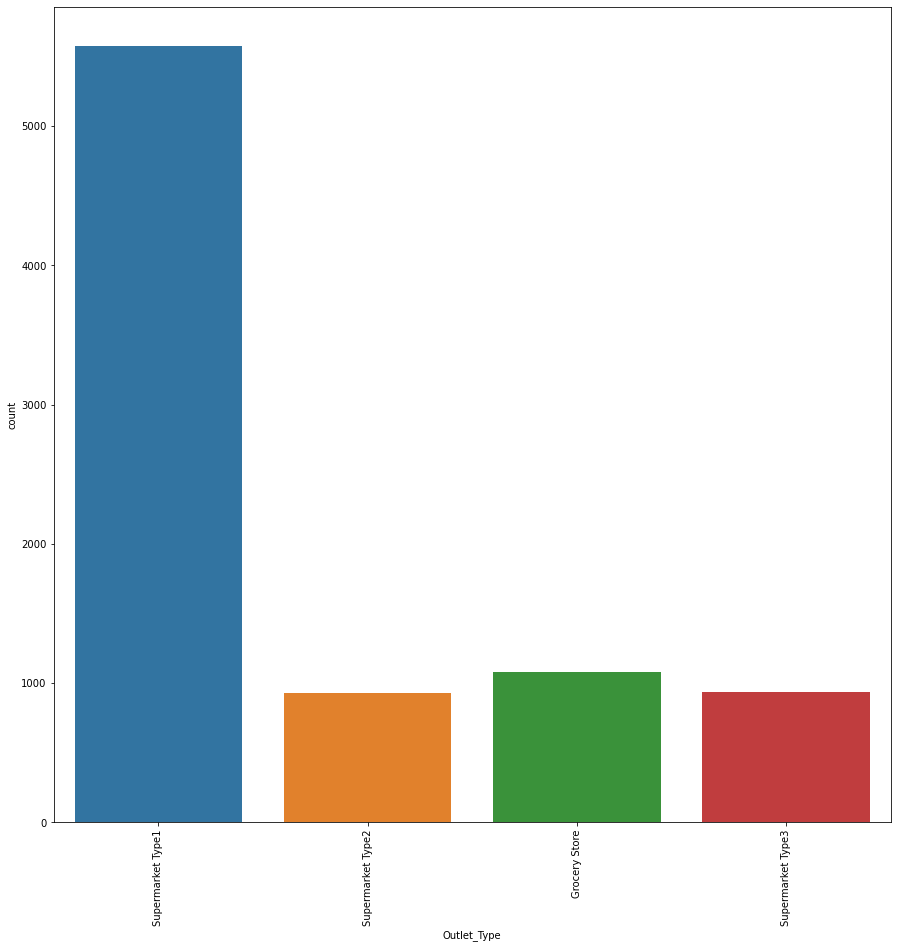

In [419]:
plt.figure(figsize=(15,15))
sns.countplot(df_train["Outlet_Type"])
plt.xticks(rotation=90)

In [420]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Most of the outlets are Supermarket Type1

# MULTIVARIATE ANALYSIS

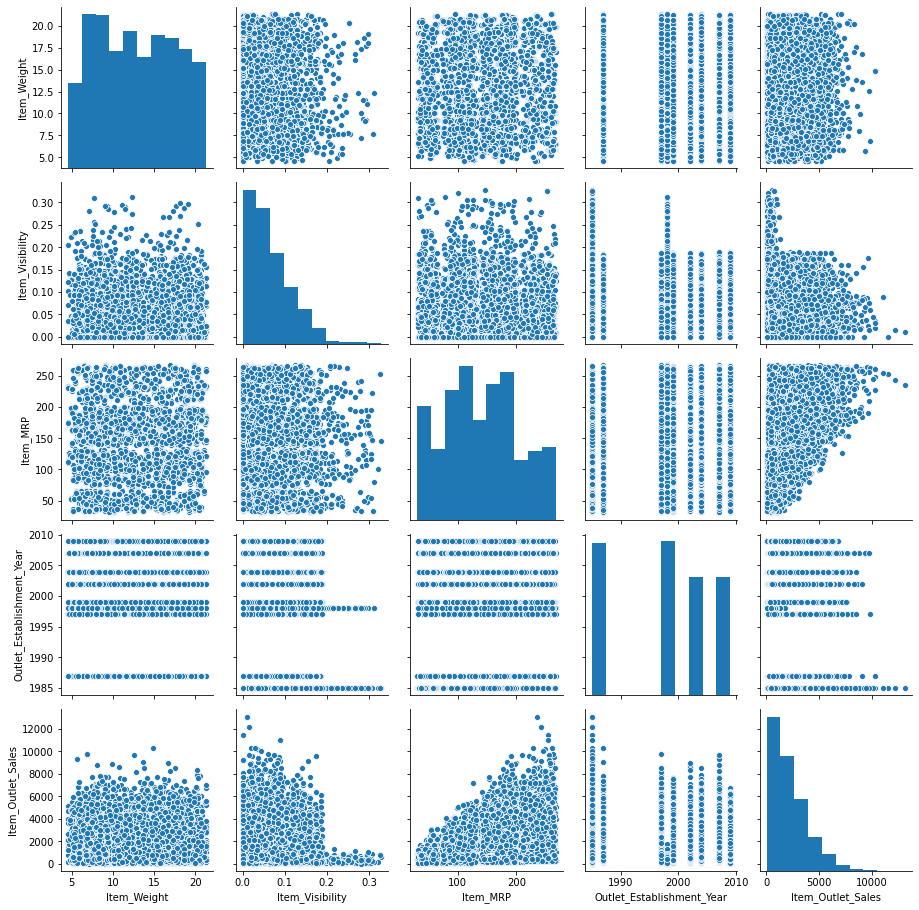

In [421]:
sns.pairplot(df_train)

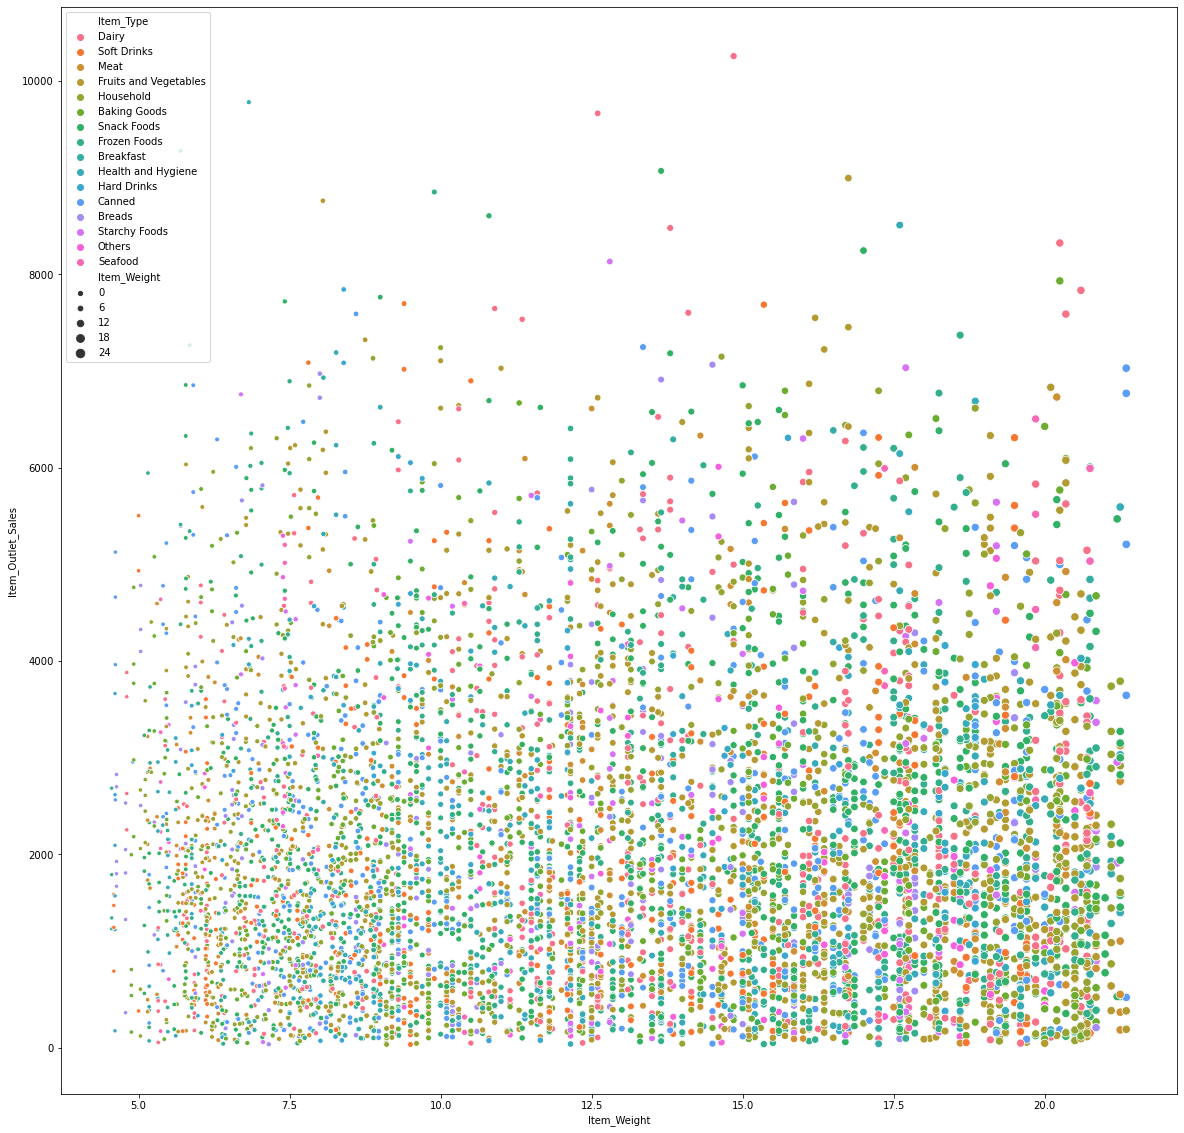

In [422]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size="Item_Weight",data=df_train)

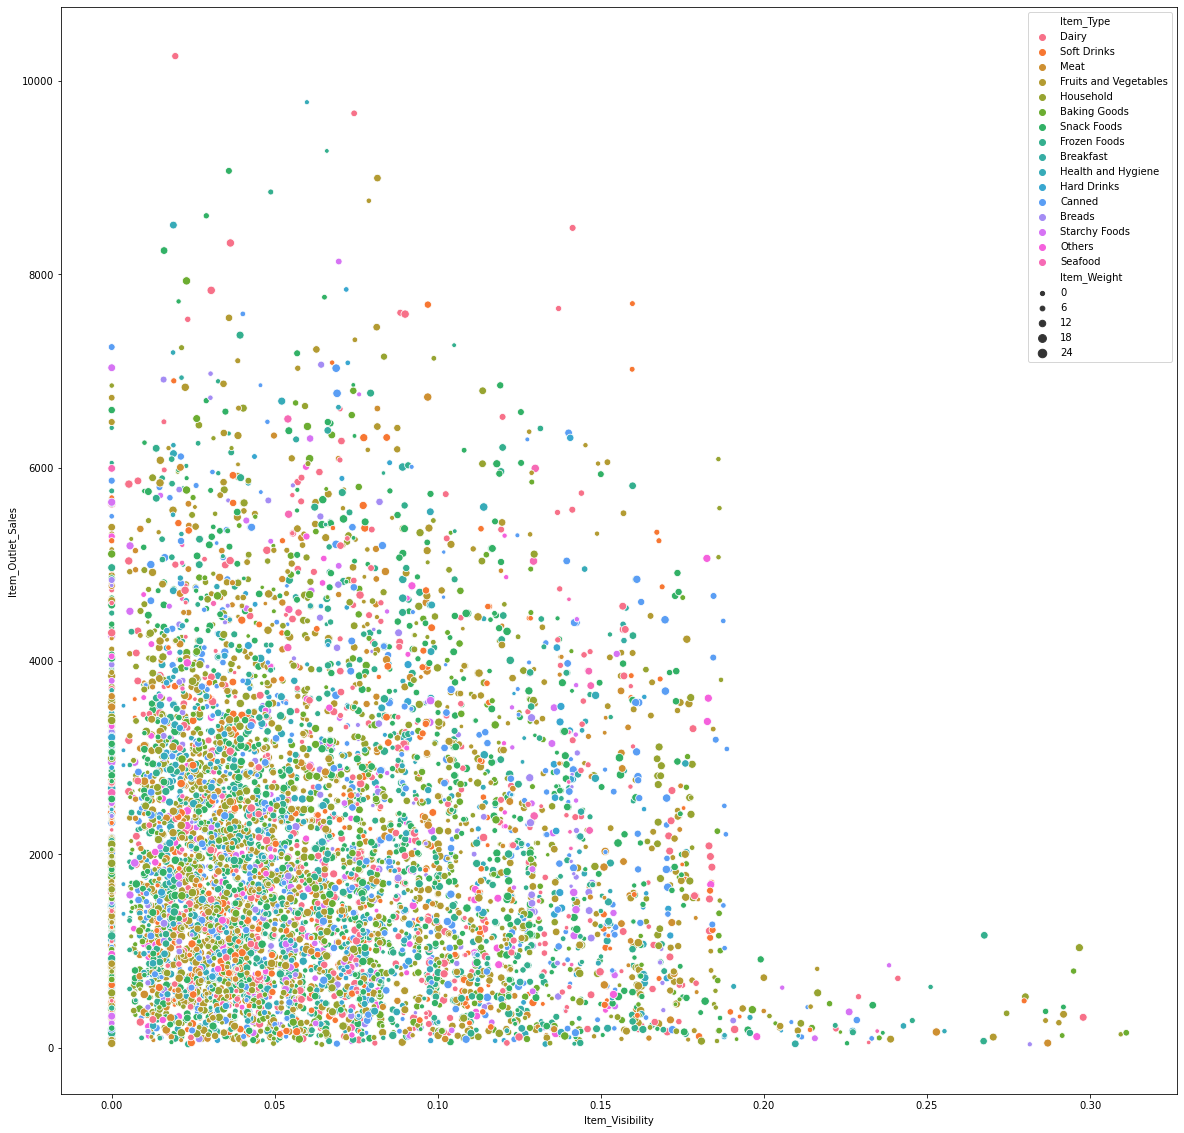

In [423]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size="Item_Weight",data=df_train)

Most of the item have low visibility and mostly food products i.e if we visit these outlets we have to search the product in some corner but they still have high Outlet sales.
People buy food more than the clothes.

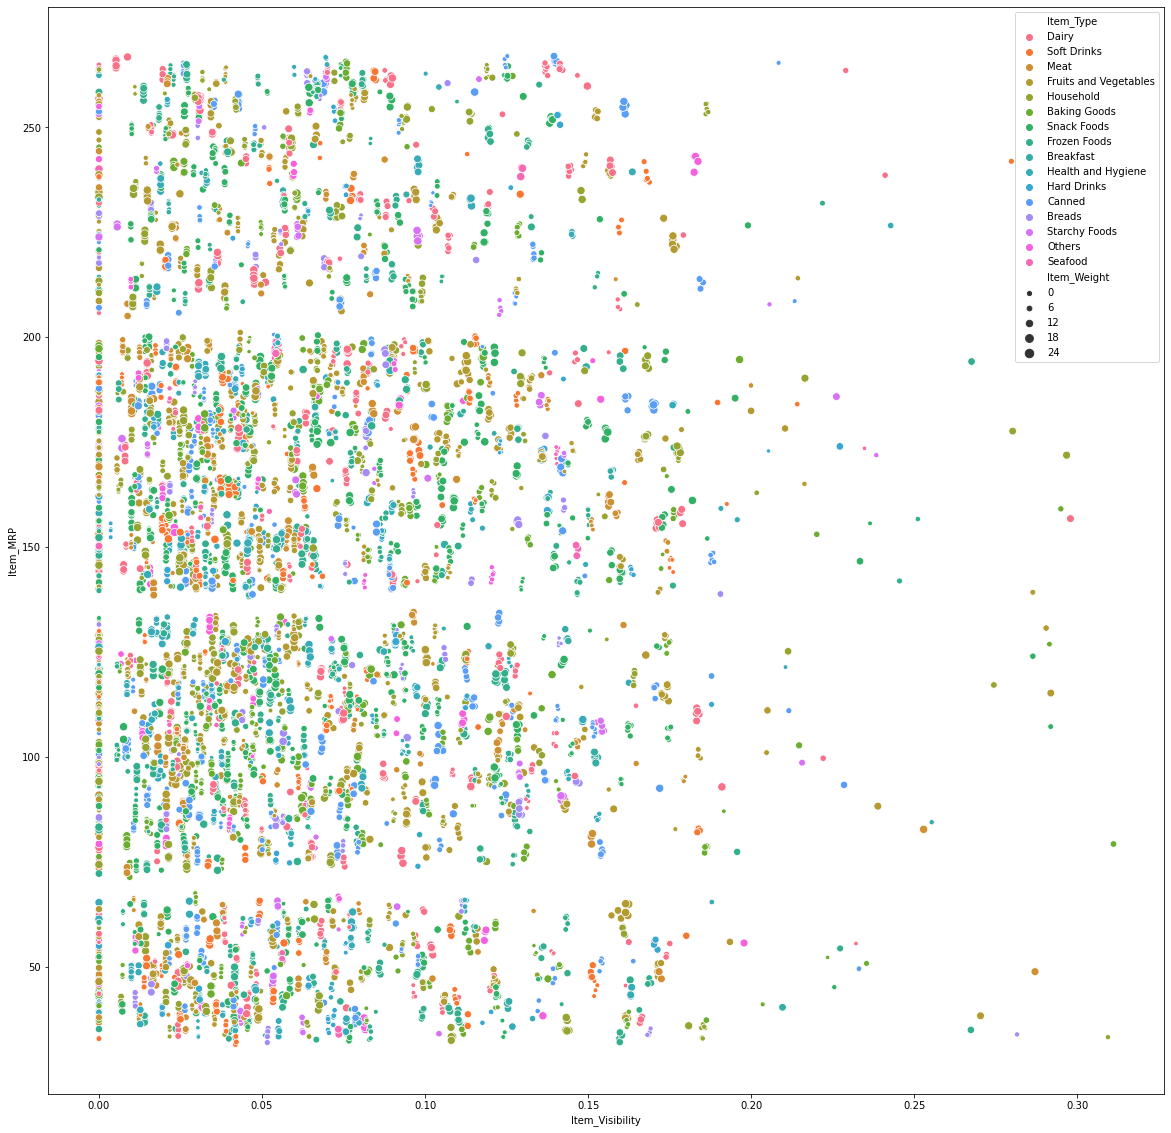

In [424]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Item_Visibility',y='Item_MRP',hue='Item_Type',size="Item_Weight",data=df_train)

From the plot it is clear that the items with low visibility has more MRP. Mostly the items are food items

In [425]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

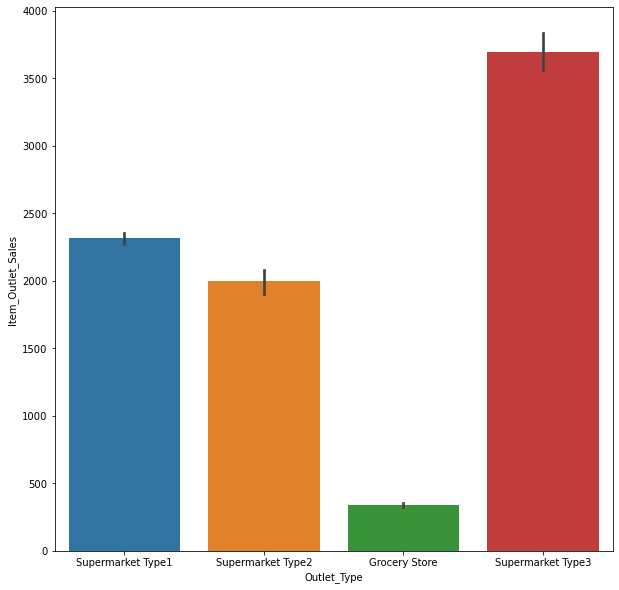

In [426]:
#finding impact of Outlet_Type on Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_train)

From this graph we interpret that in Supermarket Type 3 we have the maximum Item_Outlet_Sales

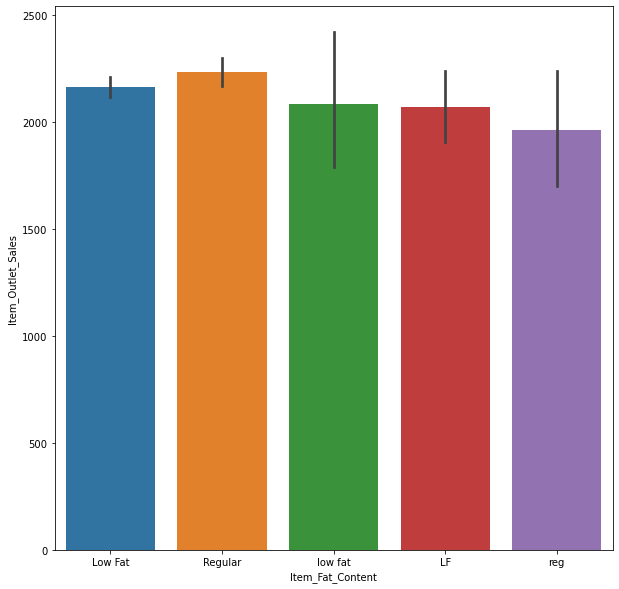

In [427]:
#impact of fat content on Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train)

In [428]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

# as we can see there is naming discrepancies in data such as LF and Low_fat both represents same thing, reg and Regular both represents same thing. So we will treat the data into same level so that it is easy to identify

In [429]:
#replacing the value in concatenated data
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':"Regular",'low fat':"Low Fat"})

In [430]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [431]:
#replacing the value in training data
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':"Regular",'low fat':"Low Fat"})

In [432]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

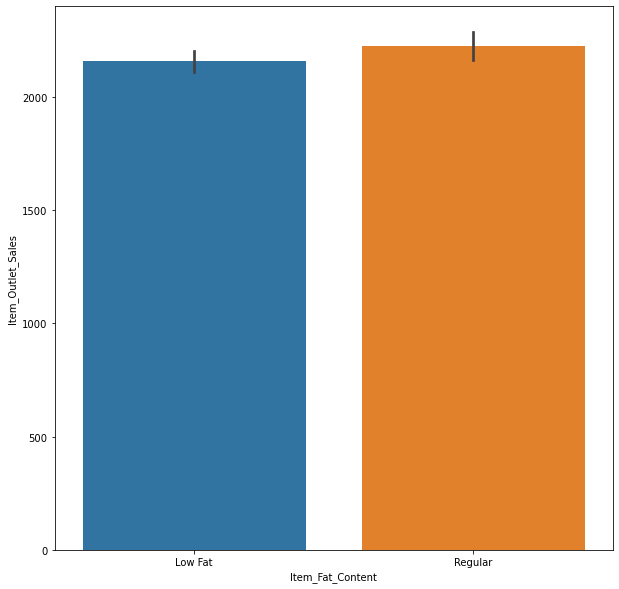

In [433]:
plt.figure(figsize=(10,10))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train)

In [434]:
#checking correlation
corr_mat=df_train.corr() #multivariate analysis
corr_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


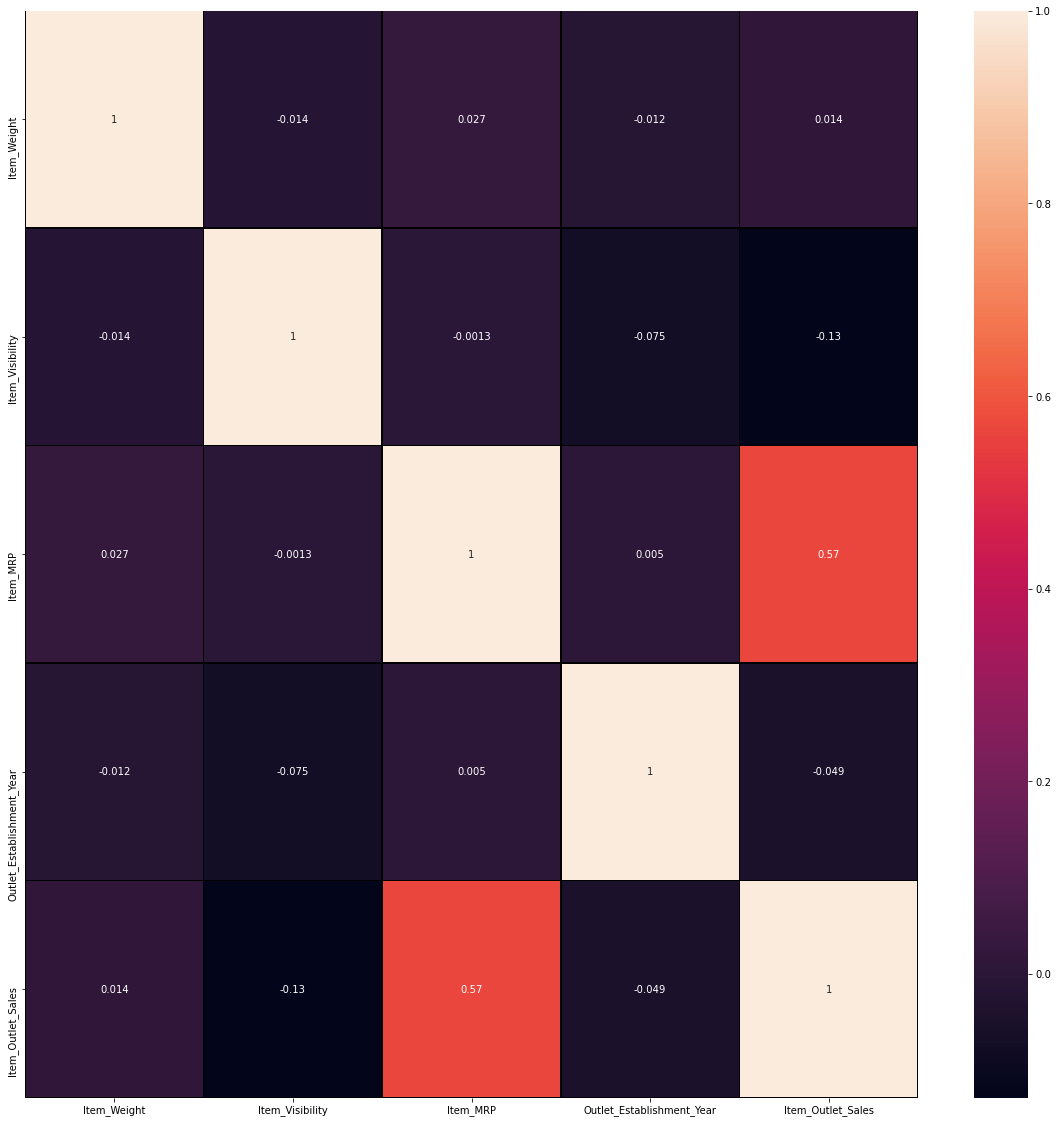

In [435]:
#checking correlation using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df_train.corr(),annot=True,linewidth=0.5,linecolor="black")

# Treating the Null values 

In [436]:
#we will replace the Nan values with mean values of respective columns
df['Item_Weight'].mean()

12.792854228644991

In [437]:
df['Item_Weight'].fillna(df["Item_Weight"].mean(),inplace=True)

In [438]:
df["Outlet_Size"].fillna("Medium",inplace=True)


since we don't know how large or how small the outlet is so we will replace the null values with median value

In [439]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

Item_outlet_sales is the target variable the data 5681 is of the training set which we have to predict so we will not treat this target variable to replace the null values

In [440]:
df[df["Item_Visibility"]==0]["Item_Visibility"].count()

879

so there are some items whose visibility is 0 so we will treat this column

In [441]:
df['Item_Visibility'].fillna(df["Item_Visibility"].median(),inplace=True)

In [442]:
df["Outlet_Establishment_Year"].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [443]:
#finding for how many years the outlets have been established
df["Outlet_Years"]=2010-df["Outlet_Establishment_Year"]
df["Outlet_Years"].describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

In [444]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [445]:
df["Item_Identifier"].value_counts()

FDS03    10
FDR13    10
FDX38    10
FDH57    10
FDL14    10
         ..
FDR51     7
FDS22     7
NCL42     7
FDI46     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

Food Items are associated with Item_Identifier FD such as Fruits and vegetables,snack foods,household.
Non consumable goods are associated with NC.
Drinkable items are identified with DR.

# We have food items Non consumable items and drinkable items so we can group all the items into these categories

In [446]:
#changing only the first two characters of the Item_Identifier
df["New_Item_Type"]=df["Item_Identifier"].apply(lambda x: x[0:2])

In [447]:
#Renaming for better understanding
df["New_Item_Type"]=df["New_Item_Type"].map({'FD':'Food','NC':'Non-Consumable','DR':"Drinks"})
df["New_Item_Type"].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [448]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,11,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,1,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,11,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,12,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,23,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,13,Food
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,1,Food
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,8,Non-Consumable
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,3,Food


# If a product is non-consumable then we should not associate fat content with it 

In [449]:
df.loc[df["New_Item_Type"]=='Non-Consumable',"Item_Fat_Content"]="Non-Edible"

In [450]:
df["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

under normal circumstances if a product is visible its sales is more. Based on this hypothesis we try to give weightage to products on different stores.

In [451]:
item_visib_avg=df.pivot_table(values="Item_Visibility",index="Item_Identifier")

In [452]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [453]:
function=lambda x: x["Item_Visibility"]/item_visib_avg["Item_Visibility"][item_visib_avg.index==x["Item_Identifier"]][0]
df["item_visib_avg"]=df.apply(function,axis=1).astype(float)

In [454]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,11,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,1,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,11,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,12,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,23,Non-Consumable,0.000000


these are the weight associated with Items.

# Dealing with categorical data

we will be converting all categorical datas into numeric values 0 or 1 using the LabelEncoder function

In [455]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source', 'Outlet_Years',
       'New_Item_Type', 'item_visib_avg'],
      dtype='object')

In [456]:
LE=LabelEncoder()
df["Outlet"]=LE.fit_transform(df["Outlet_Identifier"])#non categorical data
varib=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","New_Item_Type","Outlet_Type","Outlet"]
for i in varib:
    df[i]=LE.fit_transform(df[i])

In [457]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,11,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,1,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,11,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,12,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,23,2,0.000000,1


In [458]:
#let us create getdummies for this Label_Encoder to have a proper understanding of the columns
df=pd.get_dummies(df,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","New_Item_Type","Outlet_Type","Outlet"])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [459]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,11,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,11,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,12,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,23,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,13,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,8,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,Canned,214.6218,OUT017,2007,NaN,test,3,...,0,0,1,0,0,0,0,0,0,0


In [460]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,11,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,11,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,12,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,23,...,0,1,0,0,0,0,0,0,0,0


In [461]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

# Model Building 

In [464]:
x_train=train.drop("Item_Outlet_Sales",axis=1)

In [465]:
y_train=train["Item_Outlet_Sales"]

In [466]:
x_train.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,0.016047,249.8092,11,0.931078,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,1,0.933420,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,11,0.960069,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,12,0.000000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,23,0.000000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,23,0.874001,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,8,1.001096,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,6,0.998881,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1,1.041620,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [471]:
x_test=test.drop(["Item_Identifier","Outlet_Identifier"],axis=1).copy()

# checking for skewness

In [472]:
x_train.skew()

Item_Weight               0.098453
Item_Visibility           1.167091
Item_MRP                  0.127202
Outlet_Years              0.396641
item_visib_avg           -0.494736
Item_Fat_Content_0        0.161766
Item_Fat_Content_1        1.600639
Item_Fat_Content_2        0.616705
Outlet_Location_Type_0    0.979119
Outlet_Location_Type_1    0.738834
Outlet_Location_Type_2    0.437995
Outlet_Size_0             2.503964
Outlet_Size_1            -0.453138
Outlet_Size_2             0.979119
New_Item_Type_0           2.788057
New_Item_Type_1          -0.972654
New_Item_Type_2           1.600639
Outlet_Type_0             2.239897
Outlet_Type_1            -0.649203
Outlet_Type_2             2.511707
Outlet_Type_3             2.498184
Outlet_0                  3.525732
Outlet_1                  2.503964
Outlet_2                  2.515596
Outlet_3                  2.511707
Outlet_4                  3.634933
Outlet_5                  2.498184
Outlet_6                  2.507830
Outlet_7            

In [473]:
from sklearn.preprocessing import power_transform

In [476]:
x_train=power_transform(x_train,method="yeo-johnson")

ValueError: could not convert string to float: 'FDA15'

In [475]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,11,0.931078,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,1,0.933420,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,11,0.960069,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,12,0.000000,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,23,0.000000,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [477]:
x_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,11,0.931078,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,1,0.933420,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,11,0.960069,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.000000,182.0950,OUT010,12,0.000000,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,23,0.000000,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,23,0.874001,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,8,1.001096,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,6,0.998881,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,1,1.041620,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [478]:
x_train.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [480]:
x_train.skew()

Item_Weight               0.098453
Item_Visibility           1.167091
Item_MRP                  0.127202
Outlet_Years              0.396641
item_visib_avg           -0.494736
Item_Fat_Content_0        0.161766
Item_Fat_Content_1        1.600639
Item_Fat_Content_2        0.616705
Outlet_Location_Type_0    0.979119
Outlet_Location_Type_1    0.738834
Outlet_Location_Type_2    0.437995
Outlet_Size_0             2.503964
Outlet_Size_1            -0.453138
Outlet_Size_2             0.979119
New_Item_Type_0           2.788057
New_Item_Type_1          -0.972654
New_Item_Type_2           1.600639
Outlet_Type_0             2.239897
Outlet_Type_1            -0.649203
Outlet_Type_2             2.511707
Outlet_Type_3             2.498184
Outlet_0                  3.525732
Outlet_1                  2.503964
Outlet_2                  2.515596
Outlet_3                  2.511707
Outlet_4                  3.634933
Outlet_5                  2.498184
Outlet_6                  2.507830
Outlet_7            

In [481]:
x_train=power_transform(x_train,method="yeo-johnson")

# SCALING THE DATA

In [482]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[-0.81923038, -1.14688621,  1.62367023, ..., -0.34976195,
        -0.34997319,  2.85736174],
       [-1.7350396 , -1.03709991, -1.59501643, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 1.08849443, -1.12237453,  0.08123678, ..., -0.34976195,
        -0.34997319,  2.85736174],
       ...,
       [-0.49242389, -0.54297932, -0.86792986, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [-1.37234297,  1.45998957, -0.54899589, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 0.49564188, -0.27619496, -1.04722682, ..., -0.34976195,
         2.85736174, -0.34997319]])

In [483]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [502]:
train=df.loc[df["Source"]=='train']

In [503]:
test=df.loc[df["Source"]=='test']

In [504]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [508]:
train.drop(["Item_Identifier","Item_Type","Outlet_Identifier"],axis=1,inplace=True)

In [509]:
train.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

In [510]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [511]:
test.drop(["Item_Identifier","Item_Type","Outlet_Identifier"],axis=1,inplace=True)

In [485]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [486]:
lr_pred=lr.predict(x_test)

In [487]:
lr_pred

array([-5.48940727e+16, -2.30011122e+16, -5.62849770e+16, ...,
       -4.13585297e+16, -2.30011122e+16, -4.12993238e+16])

In [489]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

56.0

In [490]:
DTC=DecisionTreeRegressor()
DTC.fit(x_train,y_train)

DecisionTreeRegressor()

In [491]:
DTC_pred=DTC.predict(x_test)
DTC_pred

array([4111.9808, 4111.9808, 8994.958 , ..., 4111.9808, 1022.6688,
       4111.9808])

In [492]:
DTC_accuracy=round(DTC.score(x_train,y_train)*100)
DTC_accuracy

100.0

In [493]:
RFC=RandomForestRegressor()
RFC.fit(x_train,y_train)

RandomForestRegressor()

In [494]:
RFC_pred=RFC.predict(x_test)
RFC_pred

array([4561.56225 , 4667.32458 , 5467.296596, ..., 4909.988706,
       4762.194422, 4717.599138])

In [495]:
RFC_accuracy=round(RFC.score(x_train,y_train)*100)
RFC_accuracy

94.0

In [497]:
SVR=SVR()
SVR.fit(x_train,y_train)

SVR()

In [498]:
SVR_pred=SVR.predict(x_test)
SVR_pred

array([1670.43906699, 1670.43906699, 1670.43906699, ..., 1670.43906699,
       1670.43906699, 1670.43906699])

In [499]:
SVR_accuracy=round(SVR.score(x_train,y_train)*100)
SVR_accuracy

5.0